In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score





In [3]:
df=pd.read_csv("/Users/apple/Downloads/spam.csv", encoding="Latin-1")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = df[['v1','v2']]
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [6]:
df['v1'] = df['v1'].map({'ham':'No Spam','spam':'Spam alert'})

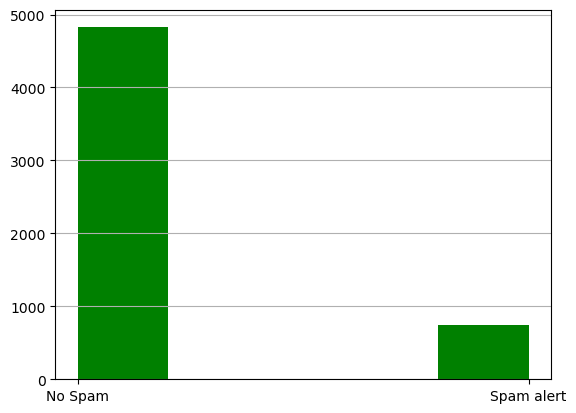

In [7]:
plt.hist(df['v1'],color = 'g' ,bins = 5)
plt.grid(axis = 'y')
plt.show()

In [16]:
y=np.array(df['v1'])
x=np.array(df['v2'])

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction import text
spam_model = MultinomialNB()
count = text.CountVectorizer()
x1 = count.fit_transform(x)


In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x1,y,test_size=0.2, random_state=42)
spam_model.fit(x_train , y_train)

MultinomialNB()

In [26]:
spam_pred = spam_model.predict(x_test)

In [27]:
print("Classifaction Report:", classification_report(y_test, spam_pred))

Classifaction Report:               precision    recall  f1-score   support

     No Spam       0.99      0.99      0.99       965
  Spam alert       0.91      0.93      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [29]:
print('Accuracy Score:', accuracy_score(y_test, spam_pred))


Accuracy Score: 0.97847533632287


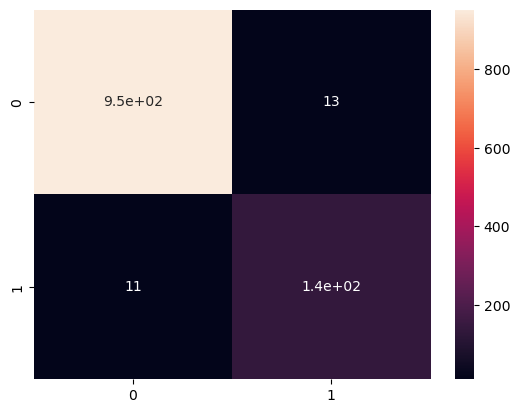

In [31]:
spam_con_mat=confusion_matrix(y_test, spam_pred)
sns.heatmap(spam_con_mat, annot=True)
plt.show()

In [34]:
from sklearn import metrics

classification_report = metrics.classification_report(y_test, spam_pred)
print("Classification Report:")
print(classification_report)

Classification Report:
              precision    recall  f1-score   support

     No Spam       0.99      0.99      0.99       965
  Spam alert       0.91      0.93      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [37]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics



# Convert text into numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer()
x1 = vectorizer.fit_transform(x)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)

# Create an instance of SVM classifier
classifier = SVC()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate other metrics (precision, recall, F1-score)
classification_report = metrics.classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)


Accuracy: 0.9766816143497757
Classification Report:
              precision    recall  f1-score   support

     No Spam       0.97      1.00      0.99       965
  Spam alert       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



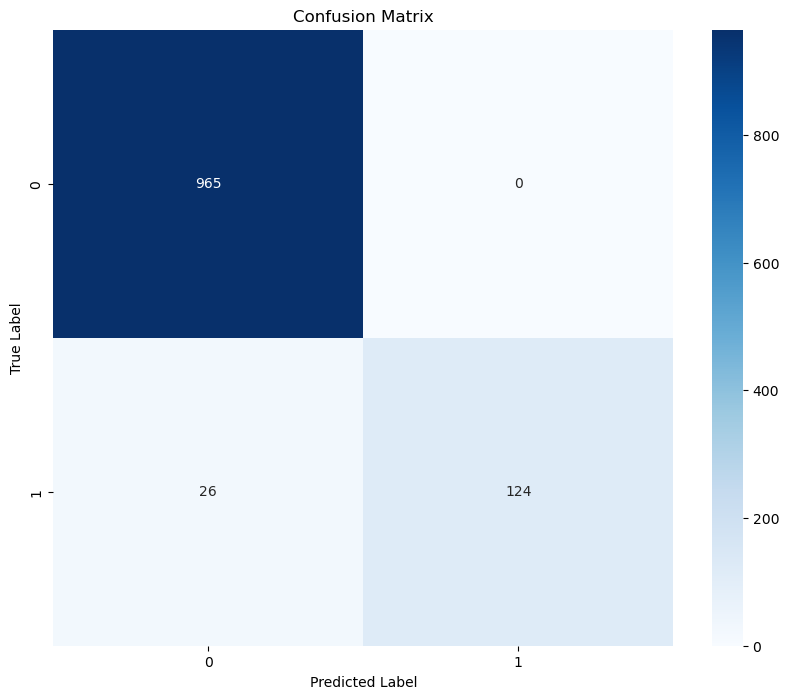

In [39]:
# Plot the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()